In [9]:
# 📚 Multi-label Dog Breed Classifier with ResNet50
# By: ChatGPT + 이상현님

In [10]:
# ✅ 1. Import Libraries
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import models
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [11]:
# ✅ 2. Multi-label Dataset Class
class MultiLabelDogDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.class_names = list(self.annotations.columns[1:])
        self.num_classes = len(self.class_names)
    def __len__(self):
        return len(self.annotations)
    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[idx, 0])
        image = Image.open(img_path).convert("RGB")
        labels = torch.tensor(self.annotations.iloc[idx, 1:].values.astype(np.float32))
        if self.transform:
            image = self.transform(image)
        return image, labels

In [12]:
# ✅ 3. Settings
data_dir = "./dog_training_set"
csv_path = "./labels.csv"
batch_size = 32
num_epochs = 10

In [13]:
# ✅ 4. Image Transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [14]:
# ✅ 5. Dataset & DataLoader
train_dataset = MultiLabelDogDataset(csv_file=csv_path, root_dir=data_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
class_names = train_dataset.class_names
num_classes = train_dataset.num_classes

In [15]:
# ✅ 6. Model Definition
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)

C:\Users\tkdgu\anaconda3\envs\Pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\tkdgu\anaconda3\envs\Pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [17]:
# ✅ 7. Loss & Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
# ✅ 8. Training Loop
print("🚀 Training Started...")
for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if (i + 1) % 1 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss:.4f}")
            running_loss = 0.0

🚀 Training Started...
Epoch [1/10], Step [1/13], Loss: 0.5846
Epoch [1/10], Step [2/13], Loss: 0.3319
Epoch [1/10], Step [3/13], Loss: 0.1159
Epoch [1/10], Step [4/13], Loss: 0.2056
Epoch [1/10], Step [5/13], Loss: 0.1783
Epoch [1/10], Step [6/13], Loss: 0.2296
Epoch [1/10], Step [7/13], Loss: 0.1127
Epoch [1/10], Step [8/13], Loss: 0.1519
Epoch [1/10], Step [9/13], Loss: 0.1836
Epoch [1/10], Step [10/13], Loss: 0.1089
Epoch [1/10], Step [11/13], Loss: 0.1062
Epoch [1/10], Step [12/13], Loss: 0.1953
Epoch [1/10], Step [13/13], Loss: 0.6280
Epoch [2/10], Step [1/13], Loss: 0.3054
Epoch [2/10], Step [2/13], Loss: 0.5067
Epoch [2/10], Step [3/13], Loss: 0.3572
Epoch [2/10], Step [4/13], Loss: 0.1970
Epoch [2/10], Step [5/13], Loss: 0.2631
Epoch [2/10], Step [6/13], Loss: 0.1979
Epoch [2/10], Step [7/13], Loss: 0.1747
Epoch [2/10], Step [8/13], Loss: 0.1579
Epoch [2/10], Step [9/13], Loss: 0.2133
Epoch [2/10], Step [10/13], Loss: 0.2599
Epoch [2/10], Step [11/13], Loss: 0.1594
Epoch [2/10]

In [19]:
# ✅ 9. Save Model
model_path = "./resnet50_multilabel.pth"
torch.save(model.state_dict(), model_path)
print(f"✅ Model saved at: {model_path}")

✅ Model saved at: ./resnet50_multilabel.pth


In [20]:
# ✅ 10. Prediction Function
def load_model(model_path, num_classes):
    model = models.resnet50(pretrained=False)
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))
    model.eval()
    return model

In [21]:
def predict_sample(image_path, model, class_names, threshold=0.3):
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
    image_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        output = model(image_tensor)
        probs = torch.sigmoid(output[0])
    predicted_indices = (probs > threshold).nonzero(as_tuple=True)[0]
    predicted_labels = [class_names[i] for i in predicted_indices]
    confidences = [probs[i].item() for i in predicted_indices]
    plt.imshow(image)
    plt.title("Predicted: " + ', '.join([f"{l} ({c:.2f})" for l, c in zip(predicted_labels, confidences)]))
    plt.axis('off')
    plt.show()
    print("🔍 Predicted Breeds:")
    for label, conf in zip(predicted_labels, confidences):
        print(f"→ {label}: {conf:.2f}")

C:\Users\tkdgu\AppData\Local\Temp\ipykernel_15328\105121931.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=tor

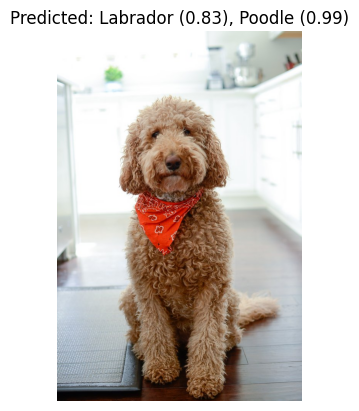

🔍 Predicted Breeds:
→ Labrador: 0.83
→ Poodle: 0.99


In [31]:
# ✅ 11. Run prediction (예시)
sample_image = "./13.jpg"
model_loaded = load_model(model_path, num_classes)
predict_sample(sample_image, model_loaded, class_names)